## import the libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

## Data Preprocessing

In [2]:
train=pd.read_csv(r"I:\ML Projects\F1 Project\project 1 copy\train copy.csv")
train.head(1)
train.columns
train[train.columns]


,Id,MSSubClass,LotArea,YearBuilt,GarageYrBlt,GarageArea,YrSold,SalePrice
0,1,60,8450,2003,2003.0,548,2008,208500
1,2,20,9600,1976,1976.0,460,2007,181500
2,3,60,11250,2001,2001.0,608,2008,223500
3,4,70,9550,1915,1998.0,642,2006,140000
4,5,60,14260,2000,2000.0,836,2008,250000
...,...,...,...,...,...,...,...,...
694,695,50,6120,1936,1995.0,576,2009,141500
695,696,20,13811,1987,1987.0,551,2006,176000
696,697,30,6000,1921,1921.0,205,2006,89000
697,698,20,6420,1952,1952.0,308,2006,123500


In [3]:
train.describe

<bound method NDFrame.describe of       Id  MSSubClass  LotArea  YearBuilt  GarageYrBlt  GarageArea  YrSold  \
0      1          60     8450       2003       2003.0         548    2008   
1      2          20     9600       1976       1976.0         460    2007   
2      3          60    11250       2001       2001.0         608    2008   
3      4          70     9550       1915       1998.0         642    2006   
4      5          60    14260       2000       2000.0         836    2008   
..   ...         ...      ...        ...          ...         ...     ...   
694  695          50     6120       1936       1995.0         576    2009   
695  696          20    13811       1987       1987.0         551    2006   
696  697          30     6000       1921       1921.0         205    2006   
697  698          20     6420       1952       1952.0         308    2006   
698  699          20     8450       1965       1973.0         336    2010   

     SalePrice  
0       208500  
1      

In [4]:
train.info


<bound method DataFrame.info of       Id  MSSubClass  LotArea  YearBuilt  GarageYrBlt  GarageArea  YrSold  \
0      1          60     8450       2003       2003.0         548    2008   
1      2          20     9600       1976       1976.0         460    2007   
2      3          60    11250       2001       2001.0         608    2008   
3      4          70     9550       1915       1998.0         642    2006   
4      5          60    14260       2000       2000.0         836    2008   
..   ...         ...      ...        ...          ...         ...     ...   
694  695          50     6120       1936       1995.0         576    2009   
695  696          20    13811       1987       1987.0         551    2006   
696  697          30     6000       1921       1921.0         205    2006   
697  698          20     6420       1952       1952.0         308    2006   
698  699          20     8450       1965       1973.0         336    2010   

     SalePrice  
0       208500  
1       1

                                        Cure Null Values 

In [5]:
train.isna().any()

Id             False
MSSubClass     False
LotArea        False
YearBuilt      False
GarageYrBlt     True
GarageArea     False
YrSold         False
SalePrice      False
dtype: bool

In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer=imputer.fit(train)
imputed=imputer.transform(train.values)
train=pd.DataFrame(data=imputed,columns=train.columns)
train

,Id,MSSubClass,LotArea,YearBuilt,GarageYrBlt,GarageArea,YrSold,SalePrice
0,1.0,60.0,8450.0,2003.0,2003.0,548.0,2008.0,208500.0
1,2.0,20.0,9600.0,1976.0,1976.0,460.0,2007.0,181500.0
2,3.0,60.0,11250.0,2001.0,2001.0,608.0,2008.0,223500.0
3,4.0,70.0,9550.0,1915.0,1998.0,642.0,2006.0,140000.0
4,5.0,60.0,14260.0,2000.0,2000.0,836.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...
694,695.0,50.0,6120.0,1936.0,1995.0,576.0,2009.0,141500.0
695,696.0,20.0,13811.0,1987.0,1987.0,551.0,2006.0,176000.0
696,697.0,30.0,6000.0,1921.0,1921.0,205.0,2006.0,89000.0
697,698.0,20.0,6420.0,1952.0,1952.0,308.0,2006.0,123500.0


In [7]:
train.isna().any()

Id             False
MSSubClass     False
LotArea        False
YearBuilt      False
GarageYrBlt    False
GarageArea     False
YrSold         False
SalePrice      False
dtype: bool

                                         Cure Outlier values

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

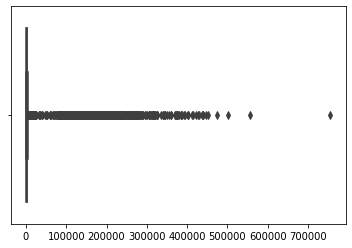

In [8]:
sns.boxplot(train.values)

In [9]:
filter=train.values<580000
cure=train[filter]
cure

,Id,MSSubClass,LotArea,YearBuilt,GarageYrBlt,GarageArea,YrSold,SalePrice
0,1.0,60.0,8450.0,2003.0,2003.0,548.0,2008.0,208500.0
0,1.0,60.0,8450.0,2003.0,2003.0,548.0,2008.0,208500.0
0,1.0,60.0,8450.0,2003.0,2003.0,548.0,2008.0,208500.0
0,1.0,60.0,8450.0,2003.0,2003.0,548.0,2008.0,208500.0
0,1.0,60.0,8450.0,2003.0,2003.0,548.0,2008.0,208500.0
...,...,...,...,...,...,...,...,...
698,699.0,20.0,8450.0,1965.0,1973.0,336.0,2010.0,138500.0
698,699.0,20.0,8450.0,1965.0,1973.0,336.0,2010.0,138500.0
698,699.0,20.0,8450.0,1965.0,1973.0,336.0,2010.0,138500.0
698,699.0,20.0,8450.0,1965.0,1973.0,336.0,2010.0,138500.0


## Build Model

                                         Split data

In [10]:
otput=train.pop('SalePrice')
otput

0      208500.0
1      181500.0
2      223500.0
3      140000.0
4      250000.0
         ...   
694    141500.0
695    176000.0
696     89000.0
697    123500.0
698    138500.0
Name: SalePrice, Length: 699, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train,otput,test_size=0.4,random_state=42)

                                         Fit data

In [12]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,Y_train)




LinearRegression()

                                         Evaluation

In [13]:
print(linear.intercept_)

3158868.0250261202


In [14]:
co=pd.DataFrame(linear.coef_,train.columns,columns=["coefficient"])
co

,coefficient
Id,7.660637
MSSubClass,-36.647646
LotArea,1.446117
YearBuilt,566.298907
GarageYrBlt,365.883912
GarageArea,187.019776
YrSold,-2450.193820


                                          Predicrion

In [15]:
predictions=linear.predict(X_test)
predictions

array([246043.0709375 , 136081.72153295, 204381.88145538,  65420.09076226,
       290269.08168605, 241551.9706784 , 193452.01045173, 142753.35895533,
       152583.82941218, 183520.31421412, 209508.92843698, 127052.23636417,
       279280.82399597,  85084.60614589, 225476.09158226, 212018.25911721,
       201288.01697852, 205207.18413987, 143813.25556395, 195207.25674666,
       183640.10421003, 197837.96824947, 215475.94076603, 264452.22666065,
       206542.52172671, 137778.91312561, 262344.09729886, 181089.06362815,
       218075.45215744, 204237.53988718, 200016.59110296, 234853.82886912,
       149696.02125876, 196119.7191967 ,  83768.54571217, 161180.04538226,
       286353.03705311,  56980.02961794, 199863.46053033, 200633.59673081,
       205605.96043293, 191812.80092823, 126611.93317134, 200456.75784909,
        81857.15341051, 274743.56890387, 214123.70322893,  99657.99393691,
       127267.78585139, 108732.96231114, 145095.40420015, 150460.23544633,
       113029.9260935 , 1

                                          Visualization

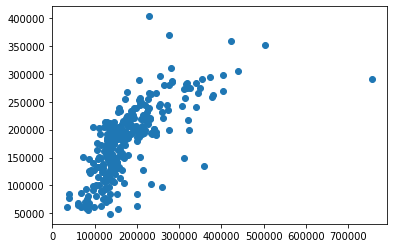

In [16]:
scatter=plt.scatter(Y_test,predictions)

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


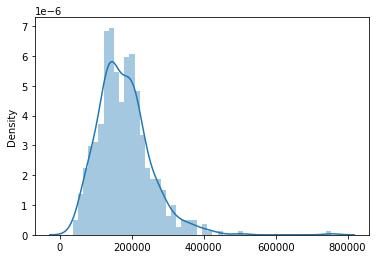

In [17]:
sns.distplot((Y_test,predictions),bins=50); 

                                         Error Estimation

In [18]:
from sklearn import metrics


In [19]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(Y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions))) 
print("R2 score =", round(metrics.r2_score(Y_test, predictions), 2))

MAE: 39597.54344491795
MSE: 3388040503.0850725
RMSE: 58206.876767999434
R2 score = 0.51


#                                   # Using another algoreithem

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)


DecisionTreeRegressor()

In [21]:
tree_regressor = dt.predict(X_test)
tree_regressor

array([269500., 130000., 138000.,  79500., 360000., 172500., 188500.,
        81000., 177000., 175000., 108000., 315000., 305900., 120000.,
       325000., 138000., 215000., 214000., 141000., 192000., 151000.,
       260000., 345000., 415298., 235000., 139000., 412500., 155000.,
       239000., 242000., 140000., 275000., 124900., 205000., 107000.,
       140000., 270000., 161000., 242000., 109500., 239000., 173000.,
       136000.,  82500.,  81000., 305000., 335000.,  82000., 190000.,
       147000.,  82000., 159000.,  90350., 157000., 167000., 106250.,
       140000., 316600., 230000., 201000., 139000., 242000., 181900.,
       115000., 112000., 120500., 222000., 242000., 167000., 149000.,
       245500., 280000., 112000., 164700., 184750., 207500., 220000.,
       208900., 215000., 113000., 110500., 194500., 148000., 157500.,
       180000., 118000., 275000., 204000., 188700., 325000., 139000.,
        81000., 148000., 165150., 190000., 253293., 305900., 375000.,
       168500., 1080

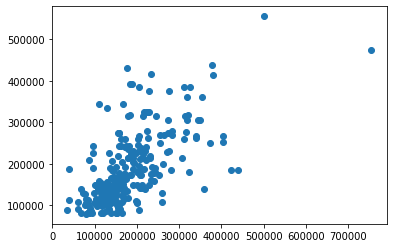

In [22]:
scater=plt.scatter(Y_test,tree_regressor)

In [24]:

print(metrics.mean_absolute_error(Y_test, tree_regressor))

print(np.sqrt(metrics.mean_squared_error(Y_test, tree_regressor)))

print(metrics.r2_score(Y_test, tree_regressor))

46990.74642857143
69675.36632286191
0.2912843175612294
